In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import copy

In [32]:
from matplotlib.projections import axes
def show_cross_play(result_matrix, title=""):
    table = np.around(result_matrix, decimals=2)
    fig, ax = plt.subplots()
    im = ax.imshow(table)
    ax.set_xticks(np.arange(0, len(table[0]), 5))
    ax.set_yticks(np.arange(0, len(table), 5))
    
    plt.xlabel("SP")
    plt.ylabel("SP")

    cbar = plt.colorbar(im)
    cbar.set_label('Avg. cumulative reward')

    plt.setp(ax.get_xticklabels(), rotation=0, ha="right",
             rotation_mode="anchor")

    ax.set_title(title)
    fig.tight_layout()
    plt.show()

def show_subplots(matrices, titles):
    fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 8))
    axes[2, 1].remove()
    axes_coordinates = [(0,0), (0,1), (1,0), (1,1), (2,0)]

    for matrix, title, (ax_x, ax_y) in zip (matrices,titles, axes_coordinates):      
      table = np.around(matrix, decimals=2)
      im = axes[ax_x,ax_y].imshow(table)
      axes[ax_x,ax_y].set_xticks(np.arange(0, len(table[0]), 5))
      axes[ax_x,ax_y].set_yticks(np.arange(0, len(table), 1))
      yticks = []
      for i in range(3):
        yticks.append(f"{i}(SP)")
      for i in range(3,11):
        yticks.append(f"{i}(POP)")
        
      for i in range(11,13):
        yticks.append(f"{i}(POP-F)")
        

      axes[ax_x,ax_y].set_yticklabels(yticks)

      axes[ax_x,ax_y].set_xlabel("SP Eval set")
      axes[ax_x,ax_y].set_ylabel("Population")
      plt.xlabel("SP eval set")
      plt.ylabel("Population")

      cbar = plt.colorbar(im, ax=axes[ax_x,ax_y])
      cbar.set_label('Avg. cumulative reward')

      plt.setp(axes[ax_x,ax_y].get_xticklabels(), rotation=0, ha="right",
              rotation_mode="anchor")
      axes[ax_x,ax_y].set_title(title)


    fig.tight_layout()
    # plt.savefig(f"Forced_coordination_CNN_POP_NO_DIF.png", dpi=300)
    plt.show()

    # return fig


def remove_daigonal(table):
  return table[~np.eye(table.shape[0],dtype=bool)].reshape(table.shape[0],-1)

def show_sorted_cross_play(matrices, legends, title="", remove_diag=False):
    labels = []
    for matrix,legend in zip(matrices,legends):

      table = np.around(matrix, decimals=2)
      if remove_diag:
        table = remove_daigonal(table)
      table = np.sort(table)

      color = None
      if "SP" in legend:
        color = 'black'
        # ax = plt.plot(range(len(table[0])), np.mean(table, axis=0), label=legend, color=color)
        ax = plt.plot(range(len(table[0])), np.quantile(table, 0.15, axis=0), label=legend, color=color)
        continue

      # ax = plt.plot(range(len(table[0])), np.mean(table, axis=0), label=legend, color=color)
      ax = plt.plot(range(len(table[0])), np.quantile(table, 0.15, axis=0), label=legend, color=color)

      # plt.fill_between(x=range(len(table[0])), y1=np.quantile(table,0.25, axis=0), y2=np.quantile(table,0.75, axis=0), alpha=0.25)
      plt.fill_between(x=range(len(table[0])), y1=np.quantile(table,0.0, axis=0), y2=np.quantile(table,0.30, axis=0), alpha=0.25)
    

    plt.xlabel("Ordered evaluation results")
    plt.tick_params(
      axis='x',          # changes apply to the x-axis
      which='both',      # both major and minor ticks are affected
      bottom=False,      # ticks along the bottom edge are off
      top=False,         # ticks along the top edge are off
      labelbottom=False)
    plt.ylabel("Average cummulative reward")
    plt.legend()

    plt.title(title)
    plt.savefig(f"FinalPopFinalPopFsTupleQ15.png", dpi=300)
    plt.show()



def show_box_plot_averages(matrices, labels):
  fig1, ax1 = plt.subplots()
  ax1.set_xlabel('Experiments')
  ax1.set_ylabel('Average cummulative reward')
  ax1.set_xticklabels(labels)
  ax1.boxplot(matrices)

  plt.savefig(f"SimpleCnnExperimentsAvg.png", dpi=300)

def get_sorted_pairwise_best(row1, row2):
  row1_sorted = np.sort(row1)
  row2_sorted = np.sort(row2)
  if np.sum(row1_sorted >= row2_sorted) > np.sum(row2_sorted >= row1_sorted):
    return row1
  else:
    return row2



# size = 1944
size = 2000

def scale_matrix(matrix):
  extended_matrix = []
  for row in matrix:
    new_row = np.array([])
    row = np.sort(row)
    for pos in range(len(row) - 1):
      new_row = np.concatenate([new_row, np.linspace(row[pos], row[pos+1], size//len(row))])
    extended_matrix.append(new_row)
  return np.array(extended_matrix)

def extract_threshold_values(matrix):
  intereseting_points = [0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
  
  q = np.quantile(matrix, 0.15, axis=0)

  values = []
  for point in intereseting_points:
    values.append(q[int(q.shape[0] * point) - 1])
  
  return values



# Simple CNN SP eval cross-play

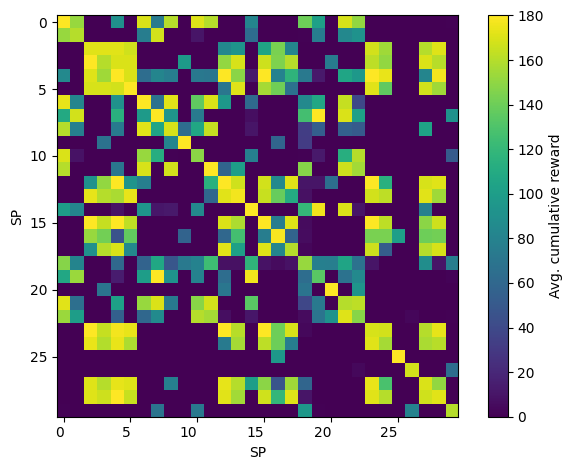

In [4]:
result_matrix = np.loadtxt("SP_EVAL2_ROP0.0_X_SP_EVAL2_ROP0.0_ENVROP0.0")
show_cross_play(result_matrix, "")


# Simple CNN SP sorted

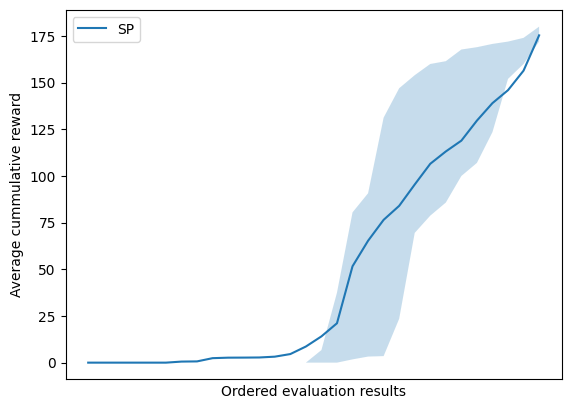

In [6]:
result_matrix = np.loadtxt("SP_EVAL2_ROP0.0_X_SP_EVAL2_ROP0.0_ENVROP0.0")

show_sorted_cross_play([result_matrix], ["SP"],"", remove_diag=False)

# Experiments names and configurations

In [7]:
def simple_cnn_eval_set_name(num, brcoef, brclip, lcoef, lclip):
  return f"POP_SMALL{num}_ROP0.0_MPOP_BRCoef{brcoef}_BRClip{brclip}_LCoef{lcoef}_LClip{lclip}_DSRFalse_PADFalse_X_SP_EVAL2_ROP0.0_ENVROP0.0"

def fs_tuple_eval_set_name(num, brcoef, brclip, lcoef, lclip):
  return f"FS_TUPLE_POP_0{num}_ROP0.0_MPOP_BRCoef{brcoef}_BRClip{brclip}_LCoef{lcoef}_LClip{lclip}_DSRFalse_PADFalse_NSP3_X_FS_TUPLE_SP_EVAL_ENVROP0.0"

def fs_channels_eval_set_name(num, brcoef, brclip, lcoef, lclip):
  return f"FS_CHANNELS_POP_0{num}_ROP0.0_MPOP_BRCoef{brcoef}_BRClip{brclip}_LCoef{lcoef}_LClip{lclip}_DSRFalse_PADFalse_NSP3_X_FS_CHANNELS_SP_EVAL_ENVROP0.0"

In [8]:
simple_cnn_seeds = [10,11,12,13,14]

simple_cnn_configs = [
    {
      "label": "No divers.",
      "params": (0.0, 0.0, 0.0, 0.0)
    },

    {
      "label": "R0",
      "params": (0.08, 0.025, 0.0, 0.0)
    },

    {
      "label": "R1",
      "params": (0.15, 0.05, 0.0, 0.0)
    },
    {
      "label": "R2",
      "params": (0.1, 0.075, 0.0, 0.0)
    },


    {
      "label": "L0",
      "params": (0.0, 0.0, 0.08, 0.03)
    },
    {
      "label": "L1",
      "params": (0.0, 0.0, 0.12, 0.07)
    },
    {
      "label": "L2",
      "params": (0.0, 0.0, 0.1, 0.15)
    },
        {
      "label": "R1L1",
      "params": (0.1, 0.05, 0.1, 0.05)
    },
]

fs_seeds = [100,101,102]

fs_configs = [
    {
      "label": "No divers.",
      "params": (0.0, 0.0, 0.0, 0.0)
    },

    {
      "label": "R0",
      "params": (0.08, 0.025, 0.0, 0.0)
    },

    {
      "label": "R1",
      "params": (0.15, 0.05, 0.0, 0.0)
    },
    {
      "label": "R2",
      "params": (0.1, 0.075, 0.0, 0.0)
    },

    {
      "label": "L0",
      "params": (0.0, 0.0, 0.08, 0.03)
    },
    {
      "label": "L1",
      "params": (0.0, 0.0, 0.12, 0.07)
    },

    {
      "label": "L2",
      "params": (0.0, 0.0, 0.1, 0.15)
    },
    {
      "label": "R0L0",
      "params": (0.08, 0.02, 0.08, 0.02)
    },
    {
      "label": "R1L1",
      "params": (0.1, 0.04, 0.1, 0.03)
    },
]



#Simple CNN ilustration of bias towards best from init

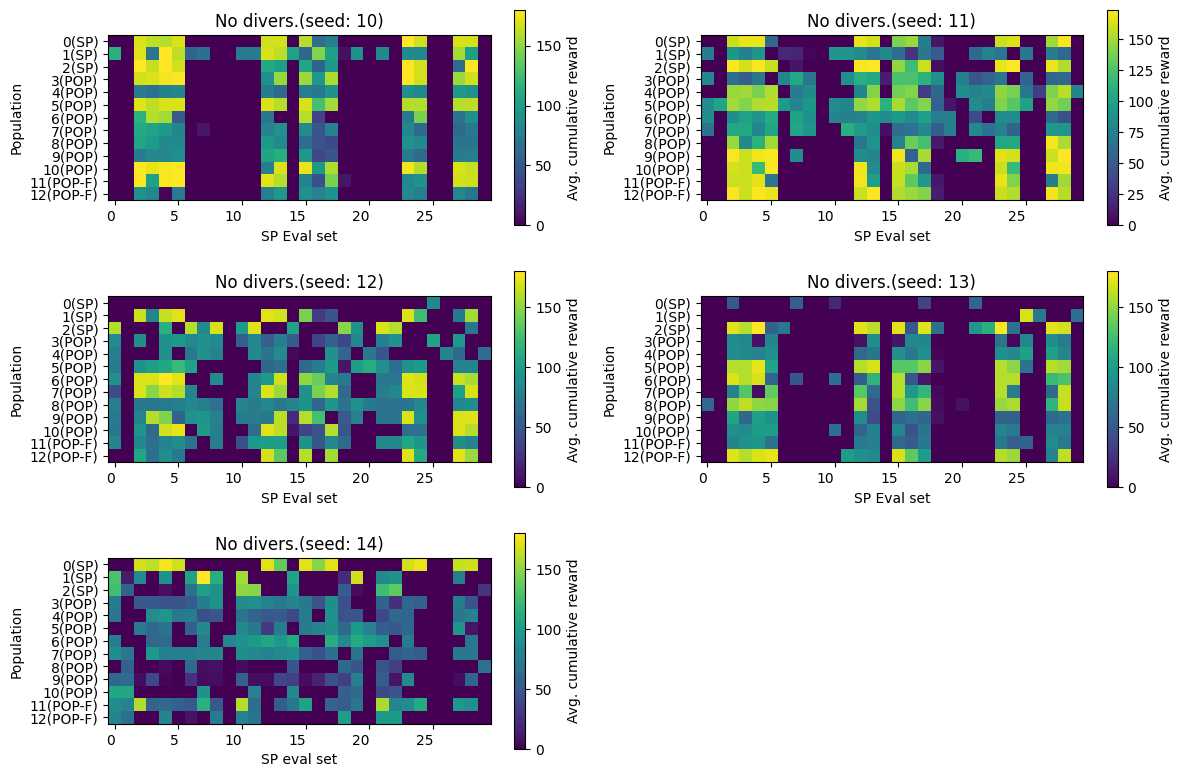

In [9]:
matrices = []
titles = []
for num,seed in zip(range(1,6), simple_cnn_seeds):
  for conf in simple_cnn_configs:
  

    (brcoef, brclip, lcoef, lclip) = conf["params"]
    eval_name = simple_cnn_eval_set_name(num, brcoef, brclip, lcoef, lclip)
    result_matrix = np.loadtxt(eval_name)
    matrices.append(result_matrix)
    titles.append(f"{conf['label']}(seed: {seed})")
    break
    
show_subplots(matrices, titles)

#Simple CNN Experiments

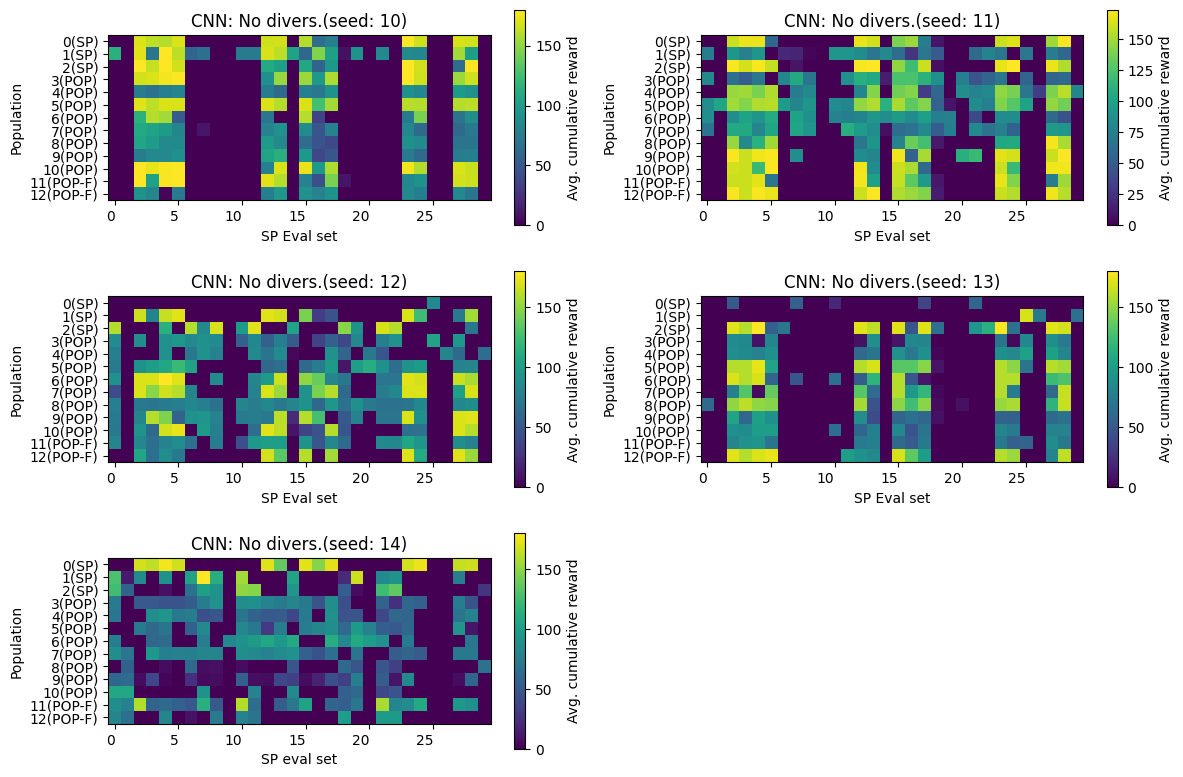

In [ ]:
diff_exp_index = 0

matrices = []
titles = []
for num,seed in zip(range(1,6), simple_cnn_seeds):
  conf = simple_cnn_configs[diff_exp_index]
  (brcoef, brclip, lcoef, lclip) = conf["params"]
  eval_name = simple_cnn_eval_set_name(num, brcoef, brclip, lcoef, lclip)
  result_matrix = np.loadtxt(eval_name)
  matrices.append(result_matrix)
  titles.append(f"CNN: {conf['label']}(seed: {seed})")

    
show_subplots(matrices, titles)

# Simple CNN Averages visualised

<ipython-input-5-377dec5e9daf>:110: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(labels)


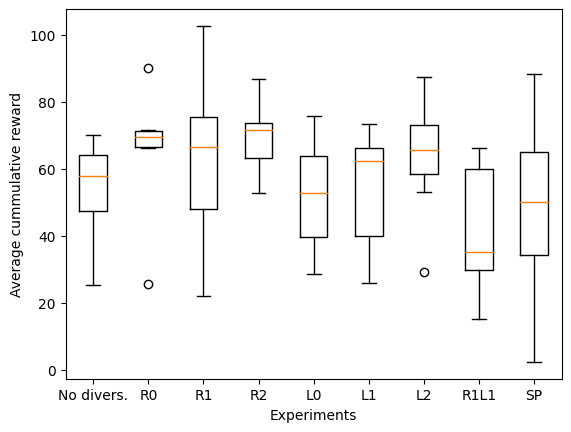

In [10]:
matrices = []
legends = []
for conf in simple_cnn_configs:
  seed_cummulative_result = None
  for num,seed in zip(range(1,6), simple_cnn_seeds):
    (brcoef, brclip, lcoef, lclip) = conf["params"]
    eval_name = simple_cnn_eval_set_name(num, brcoef, brclip, lcoef, lclip)
    result_matrix = np.loadtxt(eval_name)
    if np.mean(result_matrix[11:]) > np.mean(result_matrix[12:]):
      result_matrix = result_matrix[11:]
    else:
      result_matrix = result_matrix[12:]
    # result_matrix = result_matrix[11,:].reshape(1,-1)
    if seed_cummulative_result is None:
      seed_cummulative_result = result_matrix
    else:
      seed_cummulative_result = np.concatenate([seed_cummulative_result, result_matrix])


  matrices.append(np.mean(seed_cummulative_result,axis=1))
  legends.append(f"{conf['label']}")

result_matrix = np.loadtxt("SP_EVAL2_ROP0.0_X_SP_EVAL2_ROP0.0_ENVROP0.0")
result_matrix = remove_daigonal(result_matrix)
matrices.append(np.mean(result_matrix,axis=1))
legends.append("SP")



# print(np.mean(result_matrix,axis=1))

show_box_plot_averages(matrices, legends)

# Simple CNN POP sorted evaluation - all seeds separated


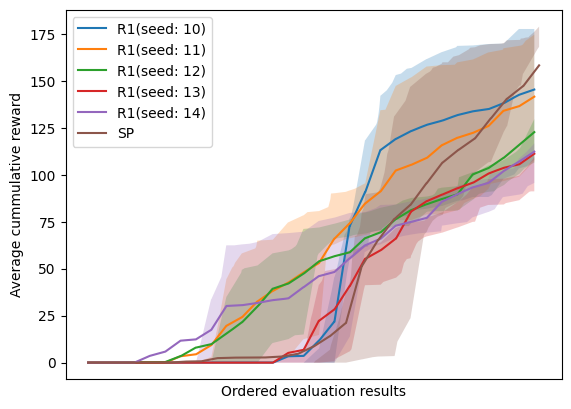

In [11]:
matrices = []
legends = []
for num,seed in zip(range(1,6), simple_cnn_seeds):
  conf = simple_cnn_configs[2]
  (brcoef, brclip, lcoef, lclip) = conf["params"]
  eval_name = simple_cnn_eval_set_name(num, brcoef, brclip, lcoef, lclip)
  result_matrix = np.loadtxt(eval_name) 
  result_matrix = result_matrix[3:]
  result_matrix = scale_matrix(result_matrix)
  matrices.append(result_matrix)
  legends.append(f"{conf['label']}(seed: {seed})")


result_matrix = np.loadtxt("SP_EVAL2_ROP0.0_X_SP_EVAL2_ROP0.0_ENVROP0.0")
result_matrix = remove_daigonal(result_matrix)
result_matrix = scale_matrix(result_matrix)
matrices.append(result_matrix)
legends.append("SP")
show_sorted_cross_play(matrices, legends, "", remove_diag=False)


# Simple CNN POP sorted evaluation - all seeds cummulated


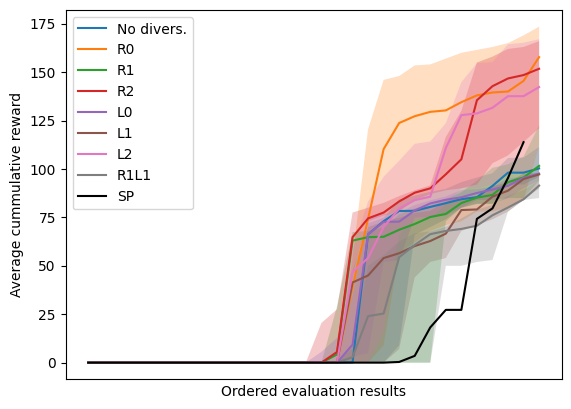

In [ ]:
matrices = []
legends = []
for conf in simple_cnn_configs:
  seed_cummulative_result = None
  for num,seed in zip(range(1,6), simple_cnn_seeds):
    (brcoef, brclip, lcoef, lclip) = conf["params"]
    eval_name = simple_cnn_eval_set_name(num, brcoef, brclip, lcoef, lclip)
    result_matrix = np.loadtxt(eval_name)
    if np.mean(result_matrix[11:]) > np.mean(result_matrix[12:]):
      result_matrix = result_matrix[11:]
    else:
      result_matrix = result_matrix[12:]
    if seed_cummulative_result is None:
      seed_cummulative_result = result_matrix
    else:
      seed_cummulative_result = np.concatenate([seed_cummulative_result, result_matrix])


  matrices.append(seed_cummulative_result)
  legends.append(f"{conf['label']}")


result_matrix = np.loadtxt("SP_EVAL2_ROP0.0_ENVROP0.0")
result_matrix = remove_daigonal(result_matrix)

matrices.append(np.array(result_matrix))
legends.append("SP")
show_sorted_cross_play(matrices, legends, "", remove_diag=False)


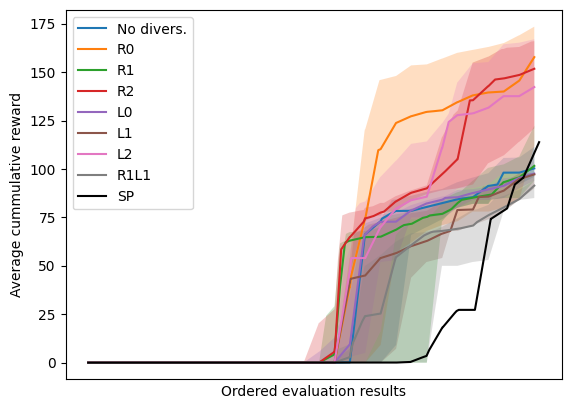

In [ ]:
matrices = []
legends = []
for conf in simple_cnn_configs:
  seed_cummulative_result = None
  for num,seed in zip(range(1,6), simple_cnn_seeds):
    (brcoef, brclip, lcoef, lclip) = conf["params"]
    eval_name = simple_cnn_eval_set_name(num, brcoef, brclip, lcoef, lclip)
    result_matrix = np.loadtxt(eval_name)
    if np.mean(result_matrix[11:]) > np.mean(result_matrix[12:]):
      result_matrix = result_matrix[11:]
    else:
      result_matrix = result_matrix[12:]
    # result_matrix = result_matrix[11:]
    # result_matrix = result_matrix[11].reshape(1,-1)
    result_matrix = np.array(result_matrix)
    result_matrix = scale_matrix(result_matrix)
    if seed_cummulative_result is None:
      seed_cummulative_result = result_matrix
    else:
      seed_cummulative_result = np.concatenate([seed_cummulative_result, result_matrix])


  matrices.append(seed_cummulative_result)
  legends.append(f"{conf['label']}")


result_matrix = np.loadtxt("SP_EVAL2_ROP0.0_ENVROP0.0")
result_matrix = remove_daigonal(result_matrix)
result_matrix = scale_matrix(result_matrix)

matrices.append(np.array(result_matrix))
legends.append("SP")
show_sorted_cross_play(matrices, legends, "", remove_diag=False)


# Simple CNN POP sorted evaluation - all seeds cummulated - best final agent

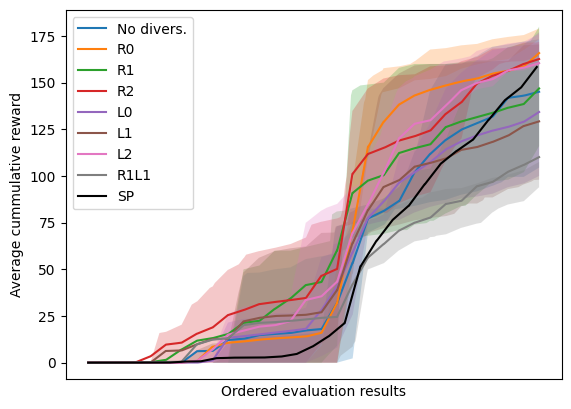

[0.0, 25.573076923076922, 78.3276923076923, 82.72846153846153, 91.33846153846154, 100.3]
[0.0, 54.403846153846146, 124.71923076923076, 131.0346153846154, 139.53846153846155, 157.75]
[0.0, 63.69230769230769, 69.92923076923077, 77.53846153846153, 86.67692307692307, 101.6]
[0.0, 68.11538461538461, 84.49615384615385, 98.68076923076923, 143.34615384615384, 151.75]
[0.0, 32.223076923076924, 74.40615384615384, 85.00461538461538, 89.54615384615386, 97.6]
[0.0, 49.896153846153844, 62.84153846153846, 68.72769230769231, 87.33846153846153, 98.0]
[0.0, 53.99999999999999, 80.71846153846154, 116.59692307692308, 132.06153846153845, 142.29999999999998]
[0.0, 13.499999999999998, 56.19461538461538, 68.19384615384615, 76.4076923076923, 91.4]
[0.0, 0.0, 0.2037313432835819, 21.98358208955222, 75.21716417910447, 113.84999999999998]


In [20]:
matrices = []
legends = []

simple_cnn_values = []

for conf in simple_cnn_configs:
  seed_cummulative_result = None
  for num,seed in zip(range(1,6), simple_cnn_seeds):
    (brcoef, brclip, lcoef, lclip) = conf["params"]
    eval_name = simple_cnn_eval_set_name(num, brcoef, brclip, lcoef, lclip)
    result_matrix = np.loadtxt(eval_name)
    result_matrix = get_sorted_pairwise_best(result_matrix[11:], result_matrix[12:])
    
    result_matrix = scale_matrix(result_matrix)
    
    if seed_cummulative_result is None:
      seed_cummulative_result = result_matrix
    else:
      seed_cummulative_result = np.concatenate([seed_cummulative_result, result_matrix])


  matrices.append(seed_cummulative_result)
  legends.append(f"{conf['label']}")
  simple_cnn_values.append(extract_threshold_values(seed_cummulative_result))
  


result_matrix = np.loadtxt("SP_EVAL2_ROP0.0_X_SP_EVAL2_ROP0.0_ENVROP0.0")
result_matrix = remove_daigonal(result_matrix)
result_matrix = scale_matrix(result_matrix)
simple_cnn_values.append(extract_threshold_values(result_matrix))
matrices.append(result_matrix)
legends.append("SP")
show_sorted_cross_play(matrices, legends, "", remove_diag=False)

# Frame stacking - Channels

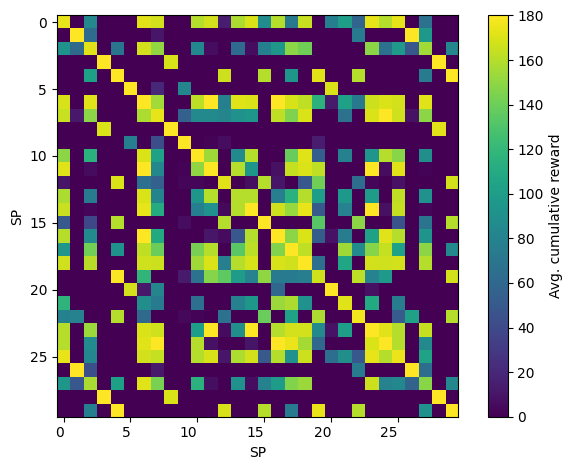

In [21]:
result_matrix = np.loadtxt("FS_CHANNELS_SP_EVAL_X_FS_CHANNELS_SP_EVAL_ENVROP0.0")
show_cross_play(result_matrix, "")



# Frame stacking - Tuple

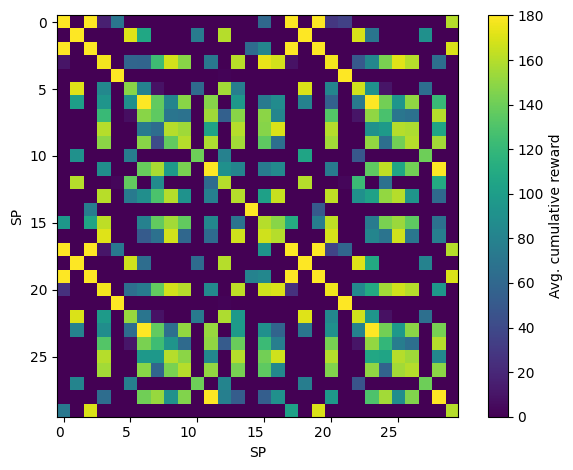

In [22]:
result_matrix = np.loadtxt("FS_TUPLE_SP_EVAL_X_FS_TUPLE_SP_EVAL_ENVROP0.0")
show_cross_play(result_matrix, "")

# Frame stacking sorted

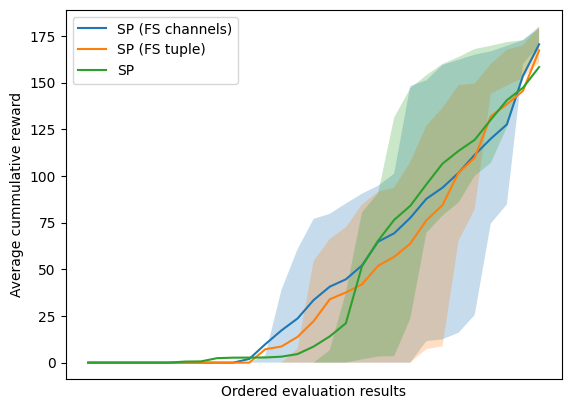

In [25]:
fs_channels = np.loadtxt("FS_CHANNELS_SP_EVAL_X_FS_CHANNELS_SP_EVAL_ENVROP0.0")
fs_tuple = np.loadtxt("FS_TUPLE_SP_EVAL_X_FS_TUPLE_SP_EVAL_ENVROP0.0")
cnn = np.loadtxt("SP_EVAL2_ROP0.0_X_SP_EVAL2_ROP0.0_ENVROP0.0")

show_sorted_cross_play([fs_channels, fs_tuple, cnn], ["SP (FS channels)", "SP (FS tuple)", "SP"],"", remove_diag=True)

# Frame stacking CHANNELS experiments

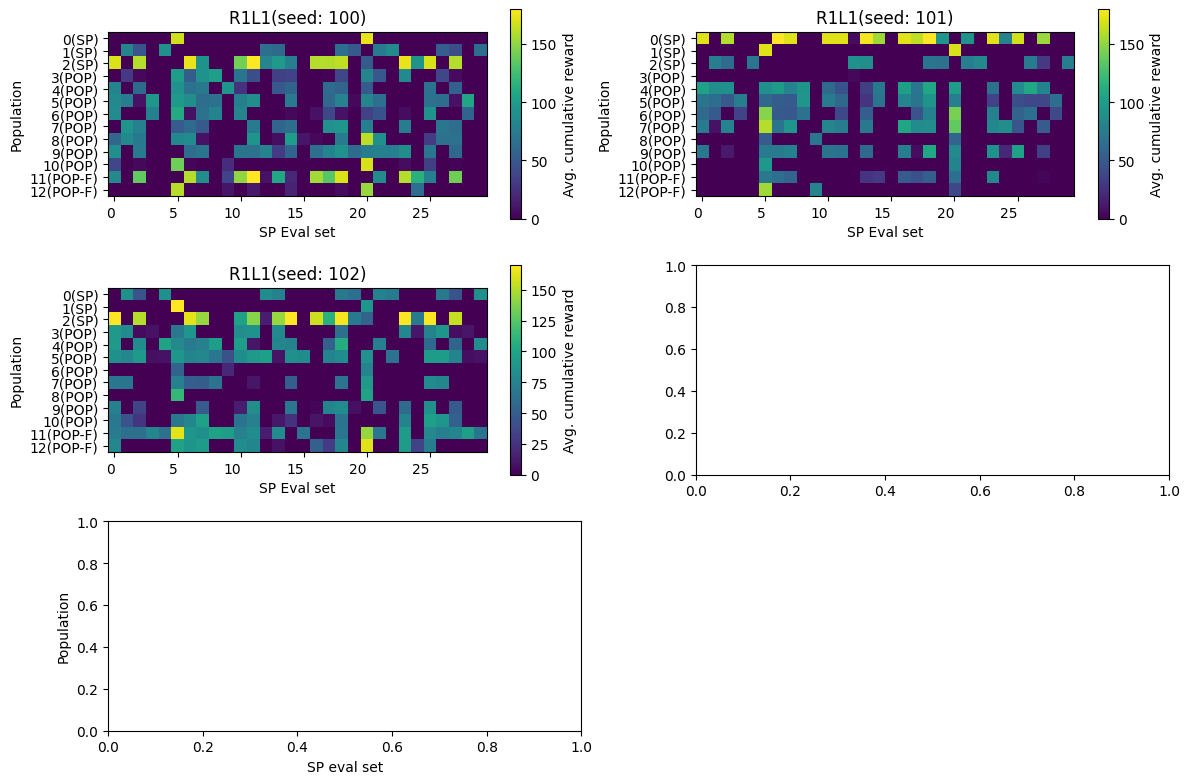

In [ ]:
matrices = []
titles = []
for num,seed in zip(range(1,4), fs_seeds):
  conf = fs_configs[8]
  (brcoef, brclip, lcoef, lclip) = conf["params"]
  eval_name = fs_channels_eval_set_name(num, brcoef, brclip, lcoef, lclip)
  result_matrix = np.loadtxt(eval_name)
  matrices.append(result_matrix)
  titles.append(f"{conf['label']}(seed: {seed})")

    
show_subplots(matrices, titles)

# FS CHANNELS Averages visualised

<ipython-input-23-28408fdfc98b>:110: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(labels)


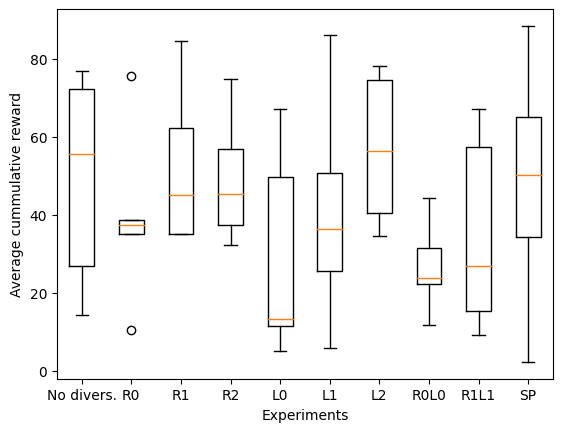

In [26]:
matrices = []
legends = []
for conf in fs_configs:
  seed_cummulative_result = None
  for num,seed in zip(range(1,4), fs_seeds):
    (brcoef, brclip, lcoef, lclip) = conf["params"]
    eval_name = fs_channels_eval_set_name(num, brcoef, brclip, lcoef, lclip)
    result_matrix = np.loadtxt(eval_name)
    
    if np.mean(result_matrix[11:]) > np.mean(result_matrix[12:]):
      result_matrix = result_matrix[11:]
    else:
      result_matrix = result_matrix[12:]
    if seed_cummulative_result is None:
      seed_cummulative_result = result_matrix
    else:
      seed_cummulative_result = np.concatenate([seed_cummulative_result, result_matrix])

  matrices.append(np.mean(seed_cummulative_result,axis=1))
  legends.append(f"{conf['label']}")

result_matrix = np.loadtxt("SP_EVAL2_ROP0.0_X_SP_EVAL2_ROP0.0_ENVROP0.0")
result_matrix = remove_daigonal(result_matrix)
matrices.append(np.mean(result_matrix,axis=1))
legends.append("SP")

show_box_plot_averages(matrices, legends)

# FS CHANNELS POP sorted evaluation - all seeds cummulated


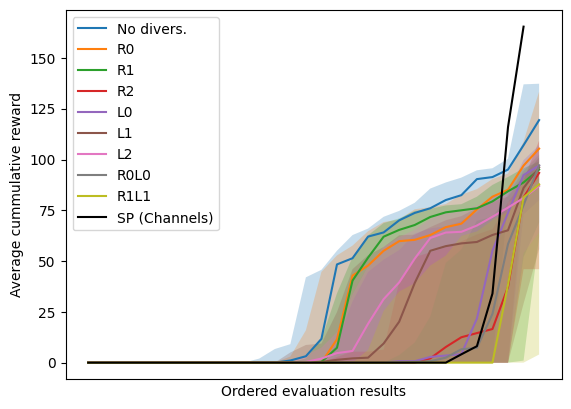

In [ ]:
matrices = []
legends = []
for conf in fs_configs:
  seed_cummulative_result = None
  for num,seed in zip(range(1,4), fs_seeds):
    (brcoef, brclip, lcoef, lclip) = conf["params"]
    eval_name = fs_channels_eval_set_name(num, brcoef, brclip, lcoef, lclip)
    result_matrix = np.loadtxt(eval_name)
    result_matrix = result_matrix[3:]
    if seed_cummulative_result is None:
      seed_cummulative_result = result_matrix
    else:
      seed_cummulative_result = np.concatenate([seed_cummulative_result, result_matrix])


  matrices.append(seed_cummulative_result)
  legends.append(f"{conf['label']}")


fs_channels = np.loadtxt("FS_CHANNELS_SP_EVAL_X_FS_CHANNELS_SP_EVAL_ENVROP0.0")
fs_channels = remove_daigonal(fs_channels)
matrices.append(fs_channels)
legends.append("SP (Channels)")
show_sorted_cross_play(matrices, legends, "", remove_diag=False)


# FS Channels POP sorted evaluation - all seeds cummulated - best final agent

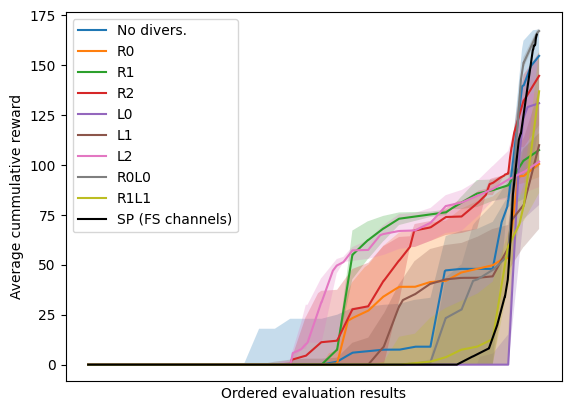

In [33]:
matrices = []
legends = []
fs_channels_values = []
for conf in fs_configs:
  seed_cummulative_result = None
  for num,seed in zip(range(1,4), fs_seeds):
    (brcoef, brclip, lcoef, lclip) = conf["params"]
    eval_name = fs_channels_eval_set_name(num, brcoef, brclip, lcoef, lclip)
    result_matrix = np.loadtxt(eval_name)
    if np.mean(result_matrix[11:]) > np.mean(result_matrix[12:]):
      result_matrix = result_matrix[11:]
    else:
      result_matrix = result_matrix[12:]
    result_matrix = scale_matrix(result_matrix)
    if seed_cummulative_result is None:
      seed_cummulative_result = result_matrix
    else:
      seed_cummulative_result = np.concatenate([seed_cummulative_result, result_matrix])


  matrices.append(seed_cummulative_result)
  legends.append(f"{conf['label']}")
  fs_channels_values.append(extract_threshold_values(seed_cummulative_result))


fs_channels = np.loadtxt("FS_CHANNELS_SP_EVAL_X_FS_CHANNELS_SP_EVAL_ENVROP0.0")
fs_channels = remove_daigonal(fs_channels)
fs_channels = scale_matrix(fs_channels)
fs_channels_values.append(extract_threshold_values(fs_channels))
matrices.append(fs_channels)
legends.append("SP (FS channels)")
show_sorted_cross_play(matrices, legends, "", remove_diag=False)

# Frame stacking Tuple experiments

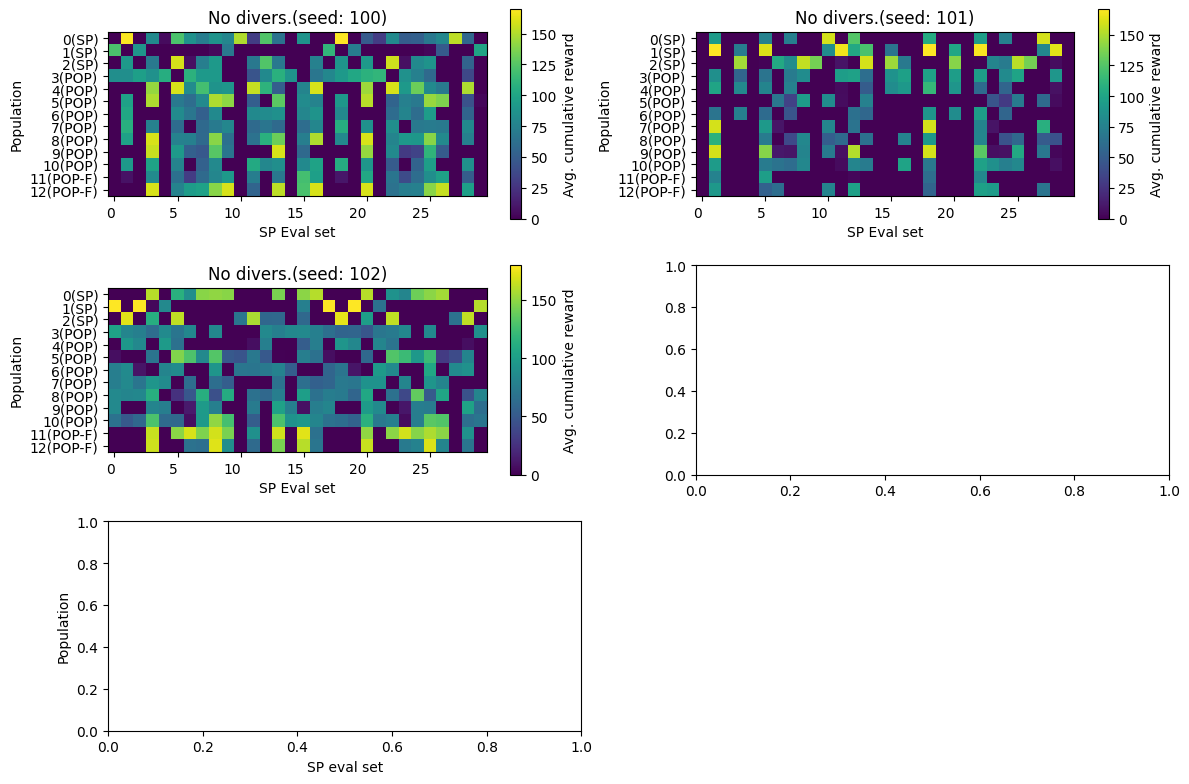

In [ ]:
matrices = []
titles = []
for num,seed in zip(range(1,4), fs_seeds):
  conf = fs_configs[0]
  (brcoef, brclip, lcoef, lclip) = conf["params"]
  eval_name = fs_tuple_eval_set_name(num, brcoef, brclip, lcoef, lclip)
  result_matrix = np.loadtxt(eval_name)
  matrices.append(result_matrix)
  titles.append(f"{conf['label']}(seed: {seed})")

    
show_subplots(matrices, titles)

# FS Tuple POP sorted evaluation - all seeds cummulated


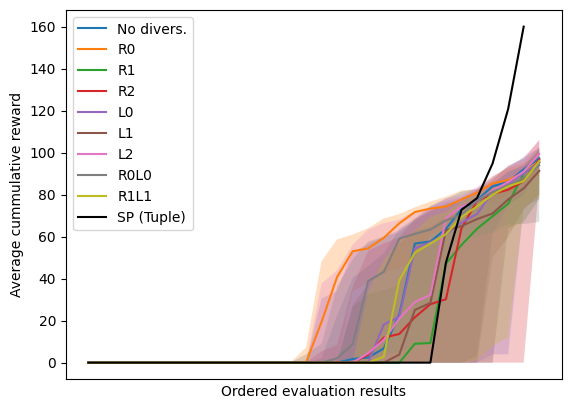

In [ ]:
matrices = []
legends = []
for conf in fs_configs:
  seed_cummulative_result = None
  for num,seed in zip(range(1,4), fs_seeds):
    (brcoef, brclip, lcoef, lclip) = conf["params"]
    eval_name = fs_tuple_eval_set_name(num, brcoef, brclip, lcoef, lclip)
    result_matrix = np.loadtxt(eval_name)
    result_matrix = result_matrix[3:]
    if seed_cummulative_result is None:
      seed_cummulative_result = result_matrix
    else:
      seed_cummulative_result = np.concatenate([seed_cummulative_result, result_matrix])


  matrices.append(seed_cummulative_result)
  legends.append(f"{conf['label']}")


fs_channels = np.loadtxt("FS_TUPLE_SP_EVAL_X_FS_TUPLE_SP_EVAL_ENVROP0.0")
fs_channels = remove_daigonal(fs_channels)
matrices.append(fs_channels)
legends.append("SP (Tuple)")
show_sorted_cross_play(matrices, legends, "", remove_diag=False)


# FS Tuple POP sorted evaluation - all seeds cummulated - best final agent

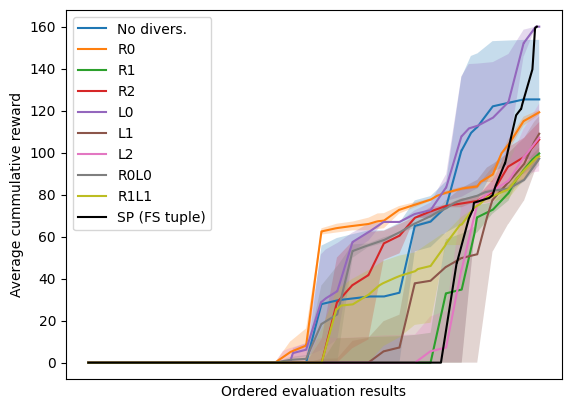

In [34]:
matrices = []
legends = []
fs_tuple_values = []
for conf in fs_configs:
  seed_cummulative_result = None
  for num,seed in zip(range(1,4), fs_seeds):
    (brcoef, brclip, lcoef, lclip) = conf["params"]
    eval_name = fs_tuple_eval_set_name(num, brcoef, brclip, lcoef, lclip)
    result_matrix = np.loadtxt(eval_name)
    result_matrix = get_sorted_pairwise_best(result_matrix[11:], result_matrix[12:])
    result_matrix = scale_matrix(result_matrix)
    if seed_cummulative_result is None:
      seed_cummulative_result = result_matrix
    else:
      seed_cummulative_result = np.concatenate([seed_cummulative_result, result_matrix])


  matrices.append(seed_cummulative_result)
  legends.append(f"{conf['label']}")
  fs_tuple_values.append(extract_threshold_values(seed_cummulative_result))


fs_channels = np.loadtxt("FS_TUPLE_SP_EVAL_X_FS_TUPLE_SP_EVAL_ENVROP0.0")
fs_channels = remove_daigonal(fs_channels)
fs_channels = scale_matrix(fs_channels)
fs_tuple_values.append(extract_threshold_values(fs_channels))
matrices.append(fs_channels)
legends.append("SP (FS tuple)")
show_sorted_cross_play(matrices, legends, "", remove_diag=False)


# POP vs POP eval - SIMPLE CNN


<ipython-input-35-0577fea4ccfc>:32: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  show_sorted_cross_play(np.array(matrices), legends)


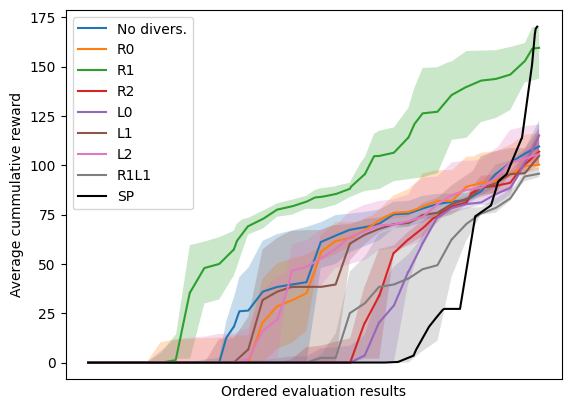

In [35]:
sp_eval = np.loadtxt("SP_EVAL2_ROP0.0_X_SP_EVAL2_ROP0.0_ENVROP0.0")
sp_eval = scale_matrix(sp_eval)

simple_cnn_finals = np.loadtxt("SIMPLE_POP_FINALS")

seeds_per_config = 5
median_results = []
legends=[]
pop_eval_simple_cnn_values = []

matrices = []
for i, config in enumerate(simple_cnn_configs):
  matrix = None
  for j, _ in enumerate(simple_cnn_configs):
    sub_no_diag_results = simple_cnn_finals[i*seeds_per_config:i*seeds_per_config + seeds_per_config, j*seeds_per_config:j*seeds_per_config + seeds_per_config]

    sub_no_diag_results = remove_daigonal(sub_no_diag_results)
    if matrix is None:
      matrix = sub_no_diag_results
    else:
      matrix = np.concatenate([matrix, sub_no_diag_results],axis=1)
  matrix = scale_matrix(matrix)

  matrices.append(matrix)
  legends.append(config['label'])
  pop_eval_simple_cnn_values.append(extract_threshold_values(matrix))

matrices.append(sp_eval)
legends.append("SP")
pop_eval_simple_cnn_values.append(extract_threshold_values(sp_eval))

show_sorted_cross_play(np.array(matrices), legends)


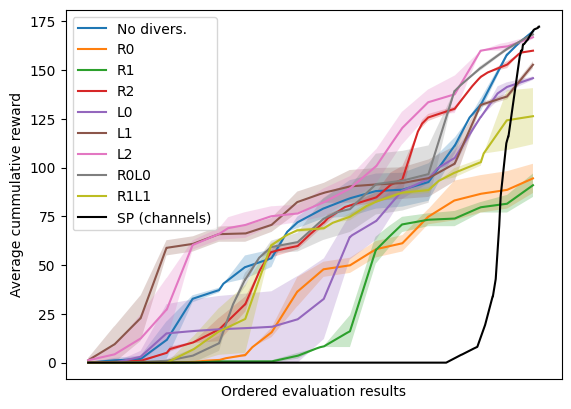

In [38]:
sp_eval = np.loadtxt("FS_CHANNELS_SP_EVAL_X_FS_CHANNELS_SP_EVAL_ENVROP0.0")
sp_eval = scale_matrix(sp_eval)


fs_channels_finals = np.loadtxt("FS_CHANNELS_POP_FINALS")

seeds_per_config = 3
median_results = []
legends=[]

pop_eval_fs_channels_values = []
matrices = []
for i, config in enumerate(fs_configs):
  matrix = None
  for j, _ in enumerate(fs_configs):
    sub_no_diag_results = fs_channels_finals[i*seeds_per_config:i*seeds_per_config + seeds_per_config, j*seeds_per_config:j*seeds_per_config + seeds_per_config]

    sub_no_diag_results = remove_daigonal(sub_no_diag_results)
    if matrix is None:
      matrix = sub_no_diag_results
    else:
      matrix = np.concatenate([matrix, sub_no_diag_results],axis=1)

  legends.append(config['label'])
  matrices.append(matrix)
  pop_eval_fs_channels_values.append(extract_threshold_values(matrix))

matrices.append(sp_eval)
legends.append("SP (channels)")
pop_eval_fs_channels_values.append(extract_threshold_values(sp_eval))


matrices_a =  copy.deepcopy(matrices)
extended_matrices = []
for matrix in matrices_a:
  extended_matrix = scale_matrix(matrix)
  extended_matrices.append(extended_matrix)

show_sorted_cross_play(extended_matrices, legends)


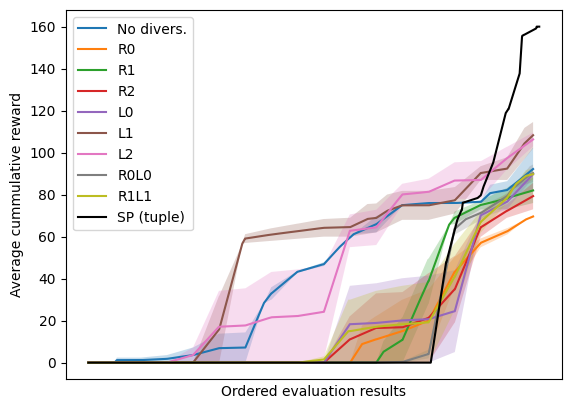

In [39]:
sp_eval = np.loadtxt("FS_TUPLE_SP_EVAL_X_FS_TUPLE_SP_EVAL_ENVROP0.0")
sp_eval = scale_matrix(sp_eval)

fs_tuple_finals = np.loadtxt("FS_TUPLE_POP_FINALS")

seeds_per_config = 3
median_results = []
legends=[]

matrices = []
pop_eval_fs_tuple_values = []
for i, config in enumerate(fs_configs):
  matrix = None
  for j, _ in enumerate(fs_configs):
    sub_no_diag_results = fs_tuple_finals[i*seeds_per_config:i*seeds_per_config + seeds_per_config, j*seeds_per_config:j*seeds_per_config + seeds_per_config]

    sub_no_diag_results = remove_daigonal(sub_no_diag_results)
    if matrix is None:
      matrix = sub_no_diag_results
    else:
      matrix = np.concatenate([matrix, sub_no_diag_results],axis=1)
  legends.append(config['label'])
  matrices.append(matrix)
  

matrices.append(sp_eval)
legends.append("SP (tuple)")



matrices_a =  copy.deepcopy(matrices)
extended_matrices = []
for matrix in matrices_a:
  extended_matrix = []
  extended_matrix = scale_matrix(matrix)
  pop_eval_fs_tuple_values.append(extract_threshold_values(extended_matrix))


  extended_matrices.append(extended_matrix)


show_sorted_cross_play(extended_matrices, legends)

# Experiments exact value evaluation

In [49]:



# simple_cnn_values - misses R0L0
arr = np.zeros((10,6))
arr[0:8] = simple_cnn_values[0:8]
arr[8] = np.full((1,6), None)
arr[9] = simple_cnn_values[8]
simple_cnn_values = arr

# fs_channels_values
fs_channels_values = np.array(fs_channels_values)
# fs_tuple_values
fs_tuple_values = np.array(fs_tuple_values)

# pop_eval_simple_cnn_values pop eval - q15 
arr = np.zeros((10,6))
arr[0:8] = pop_eval_simple_cnn_values[0:8]
arr[8] = np.full((1,6), None)
arr[9] = pop_eval_simple_cnn_values[8]
pop_eval_simple_cnn_values = arr
pop_eval_simple_cnn_values = np.array(pop_eval_simple_cnn_values)
# pop_eval_fs_channels_values - q15
pop_eval_fs_channels_values = np.array(pop_eval_fs_channels_values)
# pop_eval_fs_tuple_values - q15
pop_eval_fs_tuple_values = np.array(pop_eval_fs_tuple_values)

cramped_room_fs_channels_values = np.array([[142.89076305220883,
  152.71927710843374,
  176.36967871485942,
  191.35180722891567,
  199.8024096385542,
  210.8],
 [124.44578313253012,
  151.9367469879518,
  166.87751004016064,
  173.5371485943775,
  185.27108433734938,
  210.5],
 [80.46827309236947,
  119.3855421686747,
  159.4570281124498,
  187.17751004016066,
  198.90843373493976,
  206.6],
 [128.1863453815261,
  166.78072289156626,
  184.5991967871486,
  195.35100401606425,
  204.85542168674698,
  220.0],
 [164.01224899598392,
  179.8421686746988,
  195.75883534136545,
  202.3467871485944,
  205.12469879518073,
  220.0],
 [89.8722891566265,
  126.26987951807229,
  150.6265060240964,
  159.90602409638555,
  196.5734939759036,
  205.8],
 [134.72690763052208,
  142.0451807228916,
  154.0652610441767,
  175.9106425702811,
  193.72289156626505,
  202.25],
 [143.36224899598392,
  171.74939759036144,
  186.72369477911647,
  193.7839357429719,
  199.48192771084337,
  206.8],
 [153.07088353413656,
  171.93855421686746,
  186.08433734939757,
  196.9971887550201,
  207.0777108433735,
  214.8],
 [95.25,
  114.8206106870229,
  145.0206106870229,
  161.8996183206107,
  183.7179389312977,
  204.55]])

cramped_room_fs_tuple_values = np.array([[5.243076923076923,
  10.276923076923078,
  18.8,
  40.286923076923074,
  56.715384615384615,
  75.7],
 [19.375384615384615,
  28.6,
  44.95076923076923,
  61.09230769230769,
  80.95384615384616,
  91.8],
 [14.886153846153846,
  22.584615384615383,
  38.87384615384615,
  50.56923076923077,
  72.6,
  90.6],
 [14.88923076923077,
  19.092307692307692,
  34.96923076923077,
  62.16615384615385,
  72.93846153846154,
  92.8],
 [38.339999999999996,
  62.94615384615385,
  68.72461538461539,
  80.35461538461539,
  88.5,
  101.85],
 [0.0, 0.0, 0.37384615384615383, 2.5938461538461537, 10.78076923076923, 42.75],
 [2.2215384615384615,
  3.45,
  5.5261538461538455,
  10.967692307692307,
  23.103846153846156,
  55.25],
 [13.692307692307692,
  18.053846153846155,
  31.207692307692305,
  52.97538461538462,
  65.51538461538462,
  91.9],
 [11.611538461538462,
  15.384615384615383,
  25.953846153846154,
  38.02307692307692,
  57.84615384615385,
  85.5],
 [11.35,
  14.067910447761193,
  19.417164179104475,
  38.84626865671641,
  60.821641791044776,
  85.0]])

counter_circuit_fs_tuple_values = np.array([[10.19076923076923,
  16.46153846153846,
  26.876923076923077,
  35.70615384615384,
  48.14615384615385,
  82.8],
 [2.9969230769230766,
  4.415384615384616,
  7.6984615384615385,
  13.384615384615383,
  20.215384615384615,
  81.8],
 [7.095384615384615,
  10.184615384615384,
  12.310769230769232,
  15.264615384615386,
  35.4,
  76.6],
 [0.44999999999999996,
  0.8999999999999999,
  1.9,
  1.9,
  4.1038461538461535,
  30.599999999999998],
 [7.9,
  10.084615384615384,
  14.963076923076922,
  24.455384615384617,
  53.96153846153846,
  100.5],
 [5.393076923076922,
  9.242307692307692,
  19.799999999999997,
  32.16461538461538,
  37.86923076923077,
  64.0],
 [6.047692307692308,
  9.6,
  10.693846153846154,
  12.506153846153845,
  29.21538461538461,
  67.2],
 [0.0, 0.0, 0.0, 0.0, 0.6769230769230768, 6.6],
 [4.623076923076923,
  5.75,
  7.819230769230769,
  9.934615384615384,
  24.807692307692307,
  81.0],
 [0.0, 0.0, 0.0, 4.83134328358209, 29.063432835820883, 101.45]])


forced_coordination_max = 180
cramped_room_max = 240
counter_circuit_max = 140

In [50]:



forced_coordination_results = np.array([simple_cnn_values, fs_channels_values, fs_tuple_values])
forced_coordination_final_agents_results = np.array([pop_eval_simple_cnn_values, pop_eval_fs_channels_values, pop_eval_fs_tuple_values])


cramped_room_results = np.array([cramped_room_fs_channels_values, cramped_room_fs_tuple_values])
counter_circuit_results = np.array([counter_circuit_fs_channels_values, counter_circuit_fs_tuple_values])

forced_coordination_results_norm = np.nanmean(forced_coordination_results,axis=0) / forced_coordination_max
forced_coordination_final_agents_results_norm = np.nanmean(forced_coordination_final_agents_results,axis=0) / forced_coordination_max
cramped_room_results_norm = np.nanmean(cramped_room_results,axis=0) / cramped_room_max
counter_circuit_results_norm = np.nanmean(counter_circuit_results,axis=0) / counter_circuit_max

overall_results_norm = np.array([forced_coordination_results_norm, forced_coordination_final_agents_results_norm, cramped_room_results_norm, counter_circuit_results_norm])

table = np.round(np.mean(overall_results_norm, axis=0), decimals=3)
print(table)

for row in table:
  row_str = [str(val) for val in row]
  print('$' + '$ & $'.join(row_str) + '$')

print(np.round(np.mean(np.mean(overall_results_norm, axis=0), axis=1), decimals=3))


[[0.182 0.198 0.312 0.417 0.441 0.592]
 [0.16  0.232 0.335 0.371 0.43  0.566]
 [0.142 0.207 0.283 0.386 0.454 0.559]
 [0.127 0.2   0.287 0.405 0.451 0.572]
 [0.164 0.255 0.324 0.396 0.484 0.654]
 [0.111 0.169 0.252 0.296 0.382 0.482]
 [0.155 0.204 0.265 0.369 0.386 0.536]
 [0.144 0.199 0.249 0.311 0.386 0.532]
 [0.117 0.167 0.202 0.289 0.376 0.54 ]
 [0.066 0.08  0.103 0.193 0.364 0.774]]
$0.182$ & $0.198$ & $0.312$ & $0.417$ & $0.441$ & $0.592$
$0.16$ & $0.232$ & $0.335$ & $0.371$ & $0.43$ & $0.566$
$0.142$ & $0.207$ & $0.283$ & $0.386$ & $0.454$ & $0.559$
$0.127$ & $0.2$ & $0.287$ & $0.405$ & $0.451$ & $0.572$
$0.164$ & $0.255$ & $0.324$ & $0.396$ & $0.484$ & $0.654$
$0.111$ & $0.169$ & $0.252$ & $0.296$ & $0.382$ & $0.482$
$0.155$ & $0.204$ & $0.265$ & $0.369$ & $0.386$ & $0.536$
$0.144$ & $0.199$ & $0.249$ & $0.311$ & $0.386$ & $0.532$
$0.117$ & $0.167$ & $0.202$ & $0.289$ & $0.376$ & $0.54$
$0.066$ & $0.08$ & $0.103$ & $0.193$ & $0.364$ & $0.774$
[0.357 0.349 0.338 0.34  0.38  0.28